In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
import shap


In [5]:
df = pd.read_csv("data.csv")

In [6]:
X = df.drop(columns=['label'])
y = df['label']

In [7]:
X = X / 255.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
model = LogisticRegression(C=1, solver='newton-cg', max_iter=10000)


In [22]:
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, solver='newton-cg')

In [23]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)

In [25]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {loss:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8538
Log Loss: 0.4304
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1200
           1       0.97      0.97      0.97      1200
           2       0.76      0.76      0.76      1200
           3       0.85      0.86      0.86      1200
           4       0.76      0.80      0.78      1200
           5       0.94      0.93      0.93      1200
           6       0.65      0.59      0.62      1200
           7       0.91      0.93      0.92      1200
           8       0.95      0.94      0.94      1200
           9       0.95      0.94      0.94      1200

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



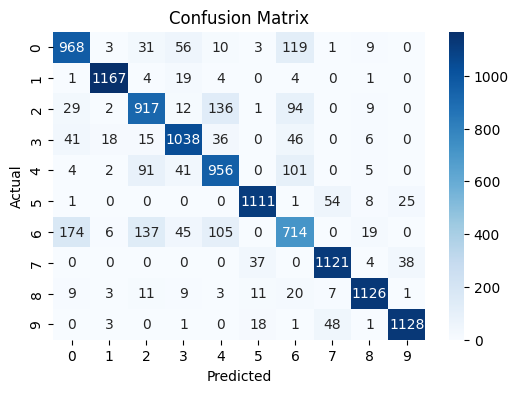

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
